In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv
/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv


#  **Import Library**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Read CSV file and getting information**

In [3]:
## Read the CSV File Using Pandas read_csv function

# print the concise summery of the dataset
df = pd.read_csv('../input/mri-and-alzheimers/oasis_longitudinal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


# **Give the total number of rows and Columns**

In [4]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# **Summary of dataset with different parameters**

In [5]:
#print concise summery of the dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# **Find total rows in each column contains null value**

In [6]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# **Duplicated() function returns the duplicate row as True and others as False**

In [7]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

# **Fill null value with column mean and median**

In [8]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

# **See how many people have Alzheimer (Demented, Non-Demented, Converted)**

(0.7098039215686275, 0.9419607843137255, 0.5419607843137255)


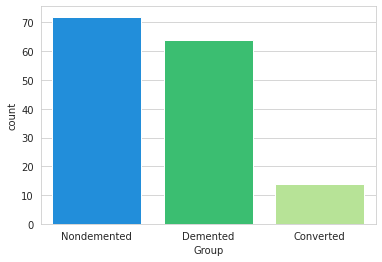

In [9]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
palette=sns.color_palette("terrain")
sns.countplot(x='Group', data=ex_df,palette=palette)
print(palette[2])


# **Convert Converted Group into Demented**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Group', ylabel='count'>

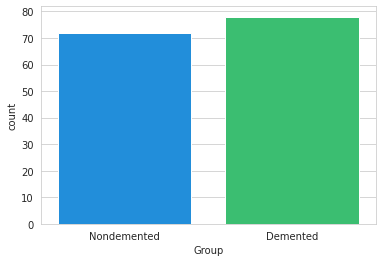

In [10]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df,palette=palette)

# **Bar Chart for No of Patients vs Group**

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

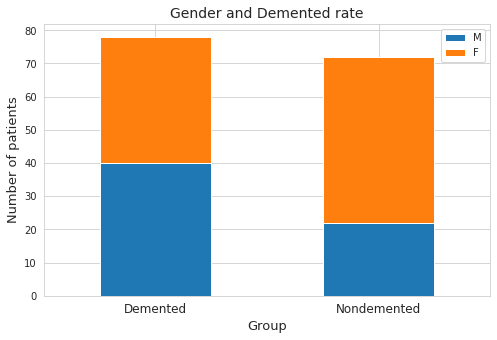

In [11]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')

plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

# **Violin plots of Gender vs CDR**

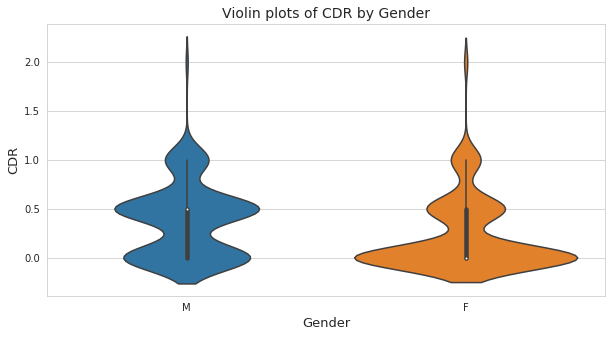

In [12]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

# **Violin plots of Age vs CDR**

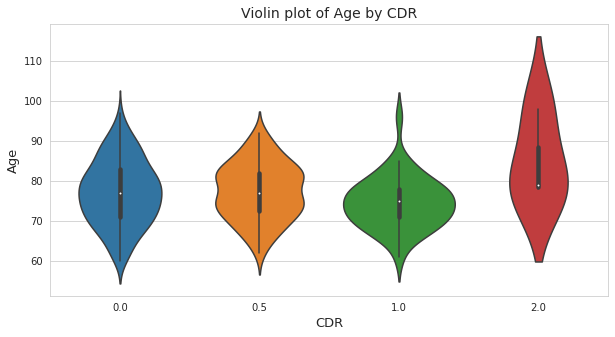

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

# **Find the outliers in each of the column**

In [14]:
#find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


# **Pairwise Bivariate Distribution**

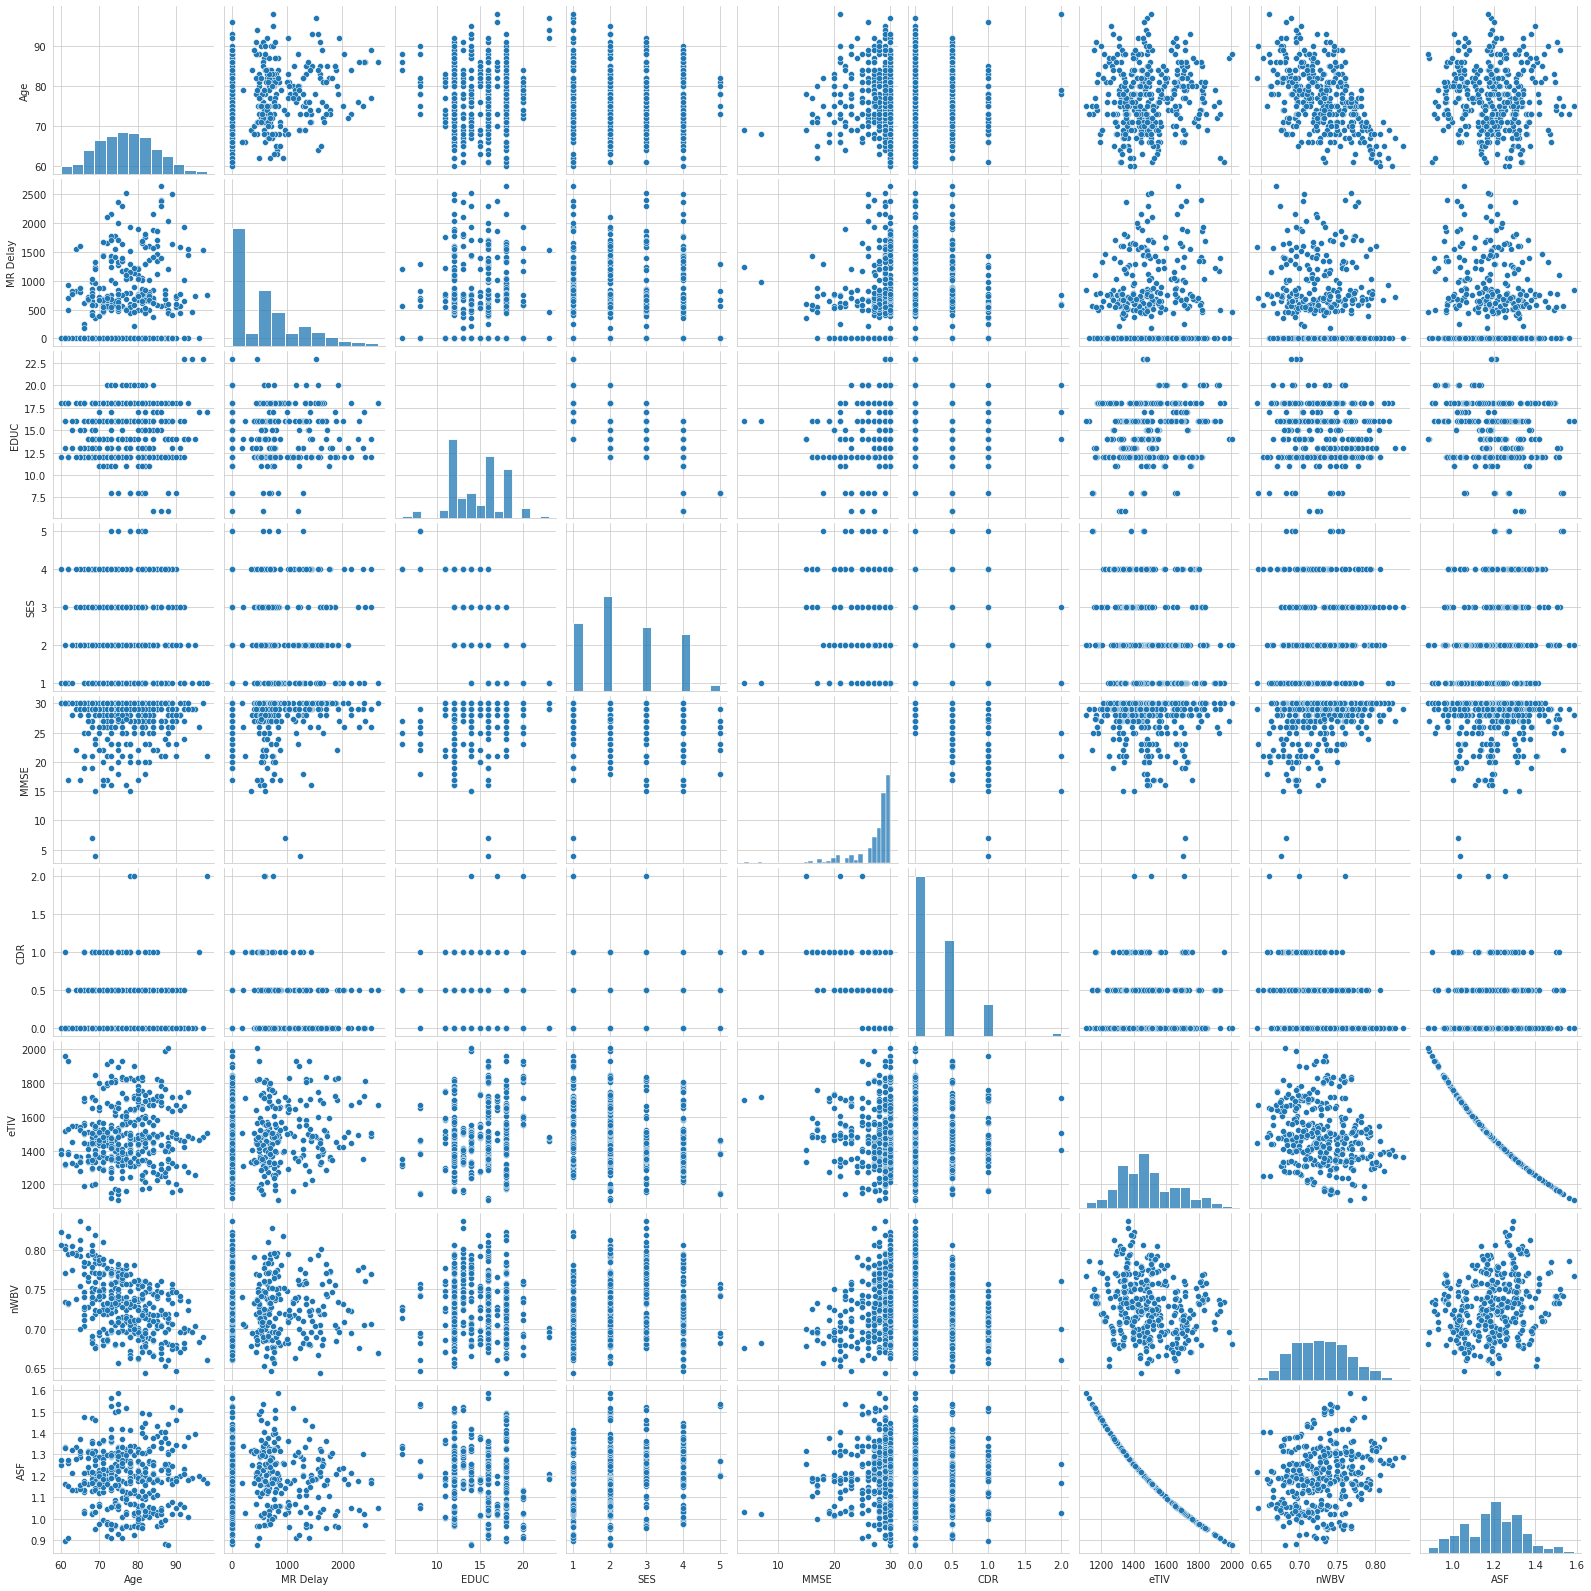

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

# **Boxplots which shows the IQR(Interquartile Range )**

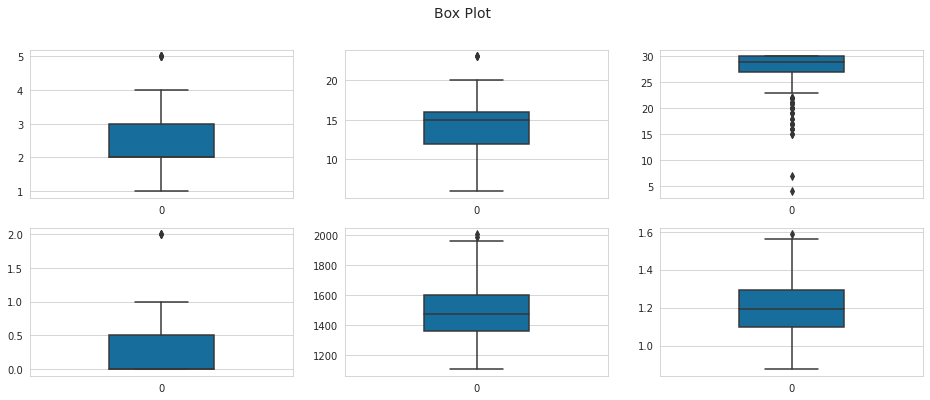

In [16]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

# **Convert Character data into Numeric**

In [17]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

# **Correlation Map**

In [18]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

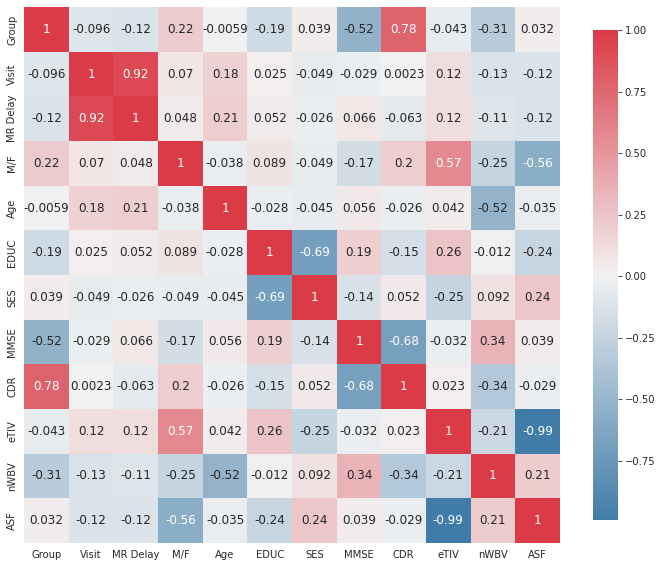

In [19]:
plot_correlation_map(df)

# **Encode columns into numeric**

In [20]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# **Splitting data into train/test**

In [21]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# **Confusion Metrics Table**

In [22]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

# **Classification report and ROC curve**

In [23]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

total_fpr = {}
total_tpr = {}
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    total_fpr[str((str(model).split('(')[0]))] = fpr
    total_tpr[str((str(model).split('(')[0]))] = tpr
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# **Accuracy score of applied model**

In [24]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

# **Import different classifier**

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# **1.Multilayer Perceptron(MLP)**



Confusion Matrix:
[[36 16]
 [ 8 52]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        52
           1       0.76      0.87      0.81        60

    accuracy                           0.79       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.79      0.79      0.78       112



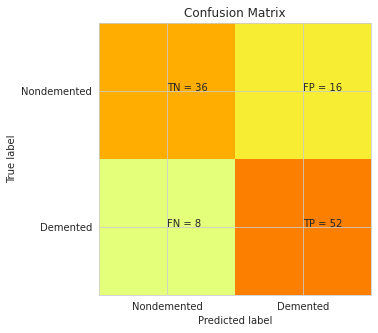

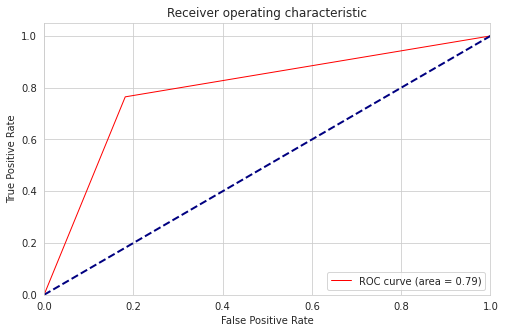


Acuuracy Of the Model:  0.7857142857142857 




In [26]:
mlp= MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
#mlp =MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(X_train, y_train.ravel())
#CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv= 5,scoring = 'roc_auc')

#rfc.fit(X_train, y_train.ravel())
#print("Best parameters set found on development set:")
#print(rfc.best_params_)
report_performance(mlp) 
roc_curves(mlp)
accuracy(mlp)

#feat_importances = pd.Series(mlp.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **2.Random Forest Classifier**



Confusion Matrix:
[[45  7]
 [11 49]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



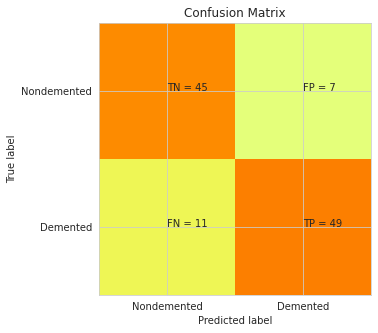

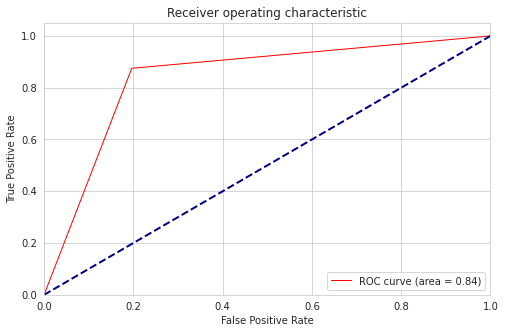


Acuuracy Of the Model:  0.8392857142857143 




In [27]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
rfc.fit(X_train, y_train.ravel())
#print("Best parameters set found on development set:")
#print(rfc.best_params_)
report_performance(rfc) 
roc_curves(rfc)
accuracy(rfc)

#feat_importances = pd.Series(rfc.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **3.Support Vector Machine (SVM)**



Confusion Matrix:
[[46  6]
 [19 41]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        52
           1       0.87      0.68      0.77        60

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.80      0.78      0.78       112



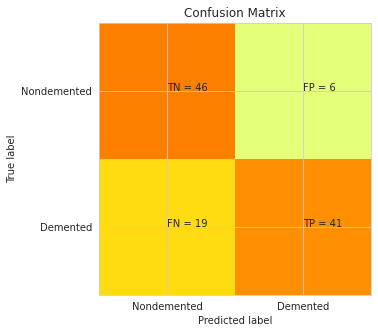

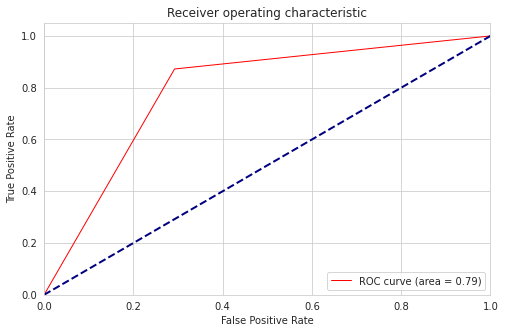


Acuuracy Of the Model:  0.7767857142857143 




In [28]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)
#feat_importances = pd.Series(svm.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **4.Decision Tree Classifier (DT)**



Confusion Matrix:
[[43  9]
 [14 46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        52
           1       0.84      0.77      0.80        60

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



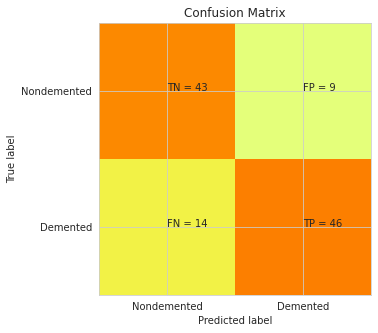

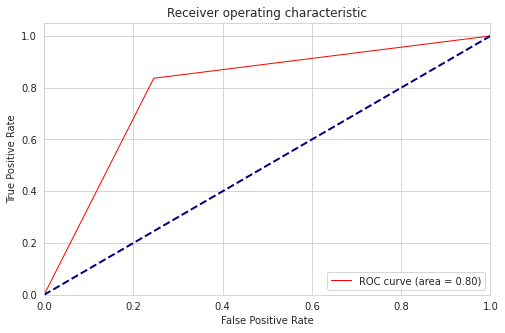


Acuuracy Of the Model:  0.7946428571428571 




In [29]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)
#importances = clf.feature_importances_


#feat_importances = pd.Series(clf_dtc.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **5.XGBOOST Classifier**



Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



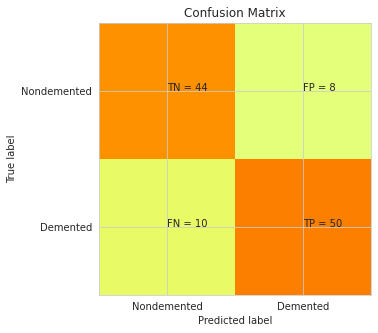

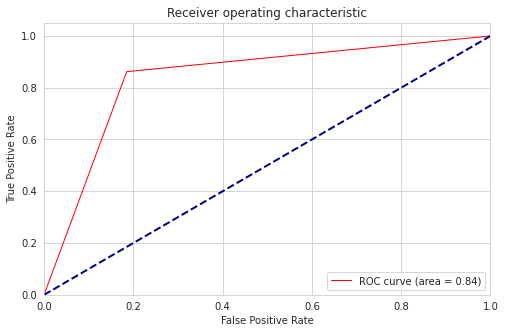


Acuuracy Of the Model:  0.8392857142857143 




In [30]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)

#feat_importances = pd.Series(clf_xgb.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()



# **6.GaussianNB (Naive_bayes)**



Confusion Matrix:
[[44  8]
 [22 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        52
           1       0.83      0.63      0.72        60

    accuracy                           0.73       112
   macro avg       0.75      0.74      0.73       112
weighted avg       0.75      0.73      0.73       112



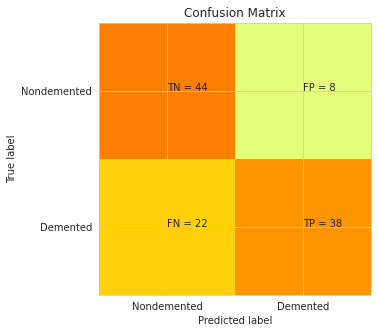

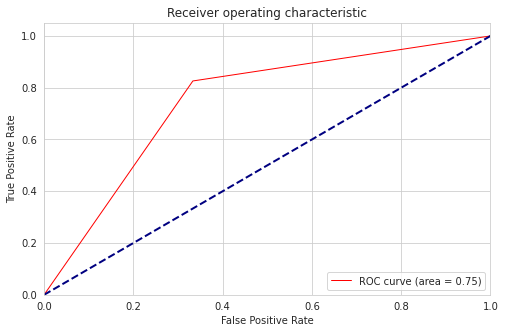


Acuuracy Of the Model:  0.7321428571428571 




In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
report_performance(gnb) 
roc_curves(gnb)
accuracy(gnb)
#importances = clf.feature_importances_


#feat_importances = pd.Series(gnb.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **7.BernoulliNB (Naive_bayes)**



Confusion Matrix:
[[34 18]
 [31 29]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.65      0.58        52
           1       0.62      0.48      0.54        60

    accuracy                           0.56       112
   macro avg       0.57      0.57      0.56       112
weighted avg       0.57      0.56      0.56       112



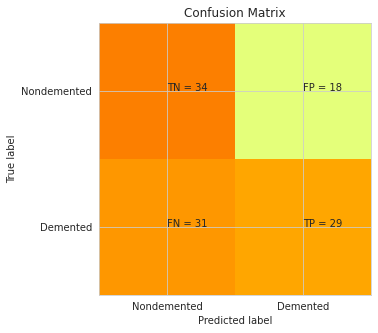

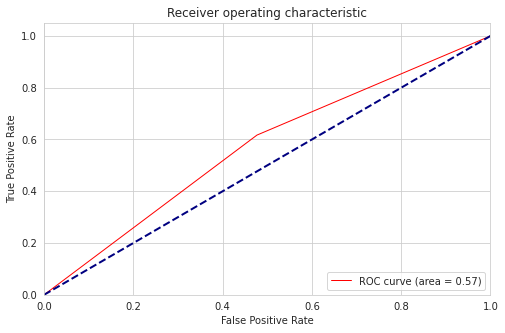


Acuuracy Of the Model:  0.5625 




In [32]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train.ravel())
report_performance(clf) 
roc_curves(clf)
accuracy(clf)
#importances = clf.feature_importances_


#feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **8.AdaBoost classifier**



Confusion Matrix:
[[45  7]
 [13 47]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        52
           1       0.87      0.78      0.82        60

    accuracy                           0.82       112
   macro avg       0.82      0.82      0.82       112
weighted avg       0.83      0.82      0.82       112



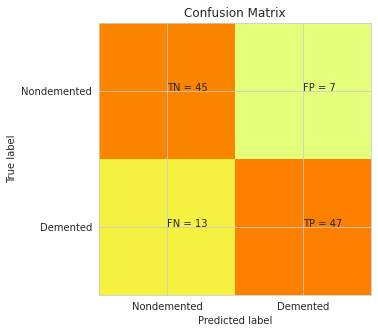

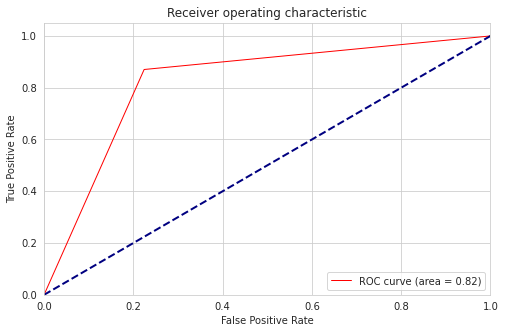


Acuuracy Of the Model:  0.8214285714285714 




In [33]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier(n_estimators=100, random_state=0)
adb.fit(X_train, y_train.ravel())
report_performance(adb) 
roc_curves(adb)
accuracy(adb)
#importances = clf.feature_importances_


#feat_importances = pd.Series(adb.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **9.Linear Discriminant Analysis (LDA)**



Confusion Matrix:
[[46  6]
 [22 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        52
           1       0.86      0.63      0.73        60

    accuracy                           0.75       112
   macro avg       0.77      0.76      0.75       112
weighted avg       0.78      0.75      0.75       112



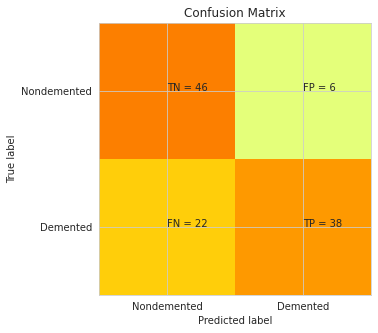

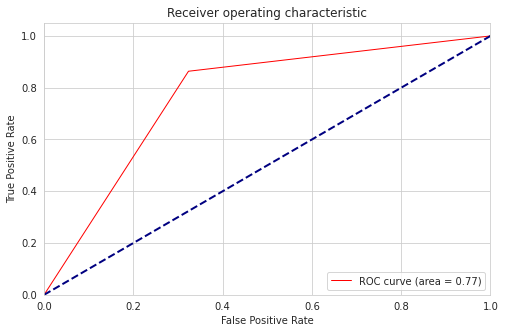


Acuuracy Of the Model:  0.75 




In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test)
lda.fit(X_train, y_train.ravel())
report_performance(lda) 
roc_curves(lda)
accuracy(lda)
#importances = clf.feature_importances_


#feat_importances = pd.Series(lda.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

In [35]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

# **10. ExtraTree Classifier**



Confusion Matrix:
[[47  5]
 [ 9 51]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        52
           1       0.91      0.85      0.88        60

    accuracy                           0.88       112
   macro avg       0.88      0.88      0.87       112
weighted avg       0.88      0.88      0.88       112



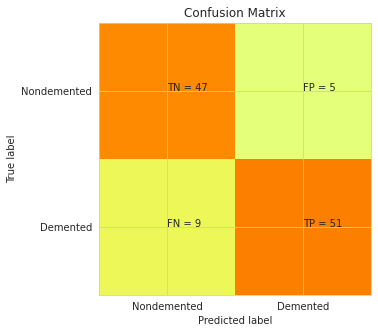

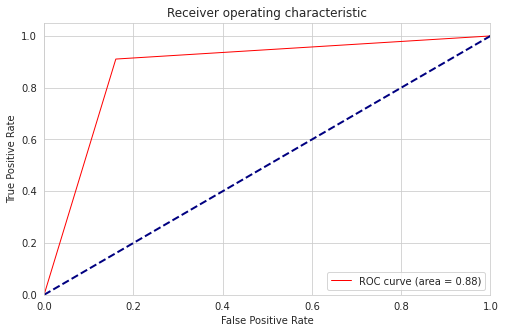


Acuuracy Of the Model:  0.875 




In [36]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train.ravel())
report_performance(et) 
roc_curves(et)
accuracy(et)
#importances = clf.feature_importances_


#feat_importances = pd.Series(et.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **11. Logistic Regression**





Confusion Matrix:
[[40 12]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        52
           1       0.78      0.70      0.74        60

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.74      0.73      0.73       112



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


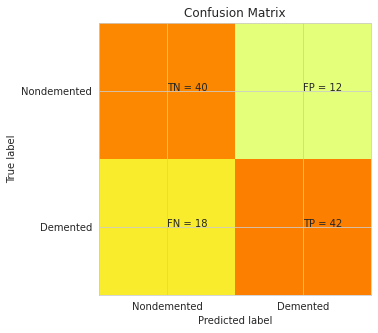

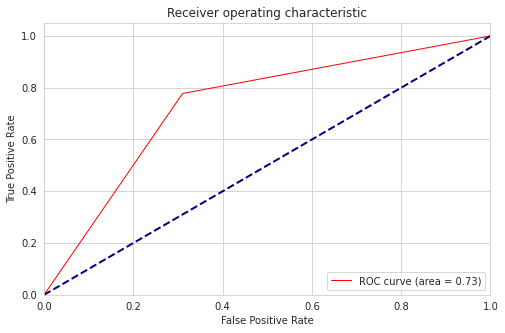


Acuuracy Of the Model:  0.7321428571428571 




In [37]:
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression()
logRegModel.fit(X_train, y_train.ravel())
report_performance(logRegModel) 
roc_curves(logRegModel)
accuracy(logRegModel)
#importances = clf.feature_importances_


#feat_importances = pd.Series(logRegModel.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **12. Hard voting (Voting Classifier)**



Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



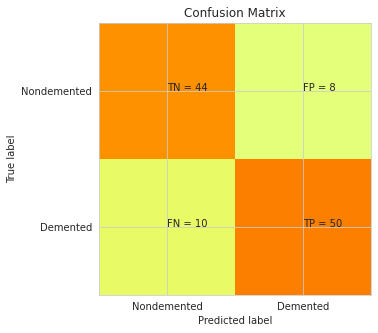

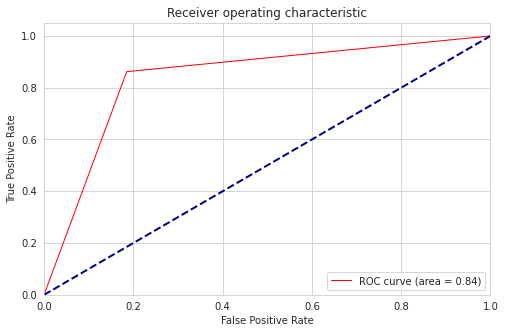


Acuuracy Of the Model:  0.8392857142857143 




In [38]:
vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
    #('svc', svm.SVC(probability=True)),
    #('xgb', XGBClassifier()),
            ('lbgm',LGBMClassifier())
           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
report_performance(vote_hard) 
roc_curves(vote_hard)
accuracy(vote_hard)
#pred = vote_hard.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")



# **13. Soft voting (Voting Classifier)**



Confusion Matrix:
[[44  8]
 [10 50]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



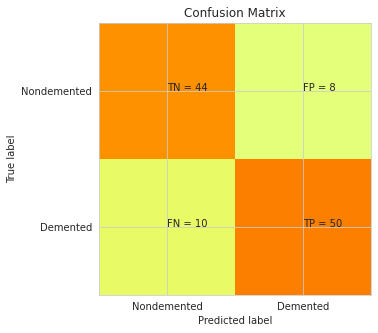

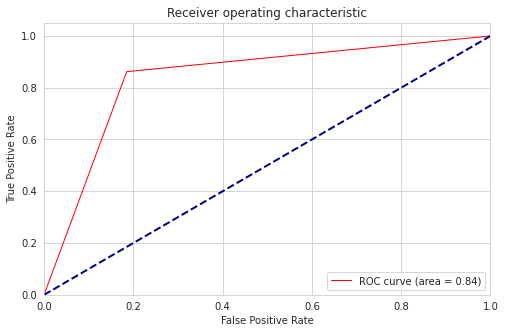


Acuuracy Of the Model:  0.8392857142857143 




In [39]:
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
report_performance(vote_soft) 
roc_curves(vote_soft)
accuracy(vote_soft)
#pred = vote_soft.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")
#feat_importances = pd.Series(vote_soft.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **14. Bagging Classifier (Ensemble Method)**



Confusion Matrix:
[[36 16]
 [22 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.69      0.65        52
           1       0.70      0.63      0.67        60

    accuracy                           0.66       112
   macro avg       0.66      0.66      0.66       112
weighted avg       0.67      0.66      0.66       112



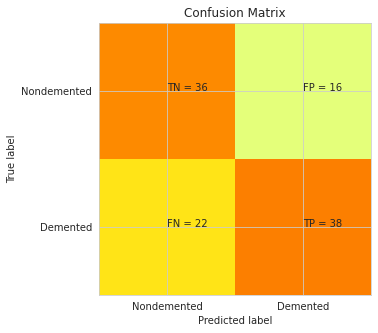

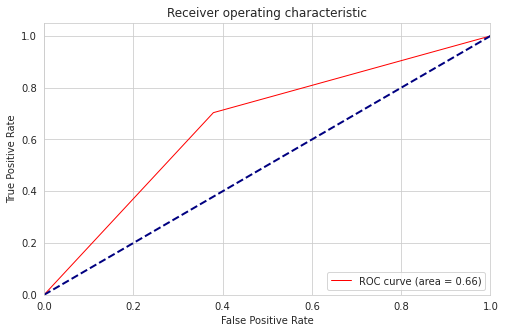


Acuuracy Of the Model:  0.6607142857142857 




In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                    max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train.ravel())
report_performance(bagging) 
roc_curves(bagging)
accuracy(bagging)
#importances = clf.feature_importances_

#feat_importances = pd.Series(bagging.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **15. Gradient Boosting Classifier (Ensemble Method)**



Confusion Matrix:
[[41 11]
 [13 47]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        52
           1       0.81      0.78      0.80        60

    accuracy                           0.79       112
   macro avg       0.78      0.79      0.79       112
weighted avg       0.79      0.79      0.79       112



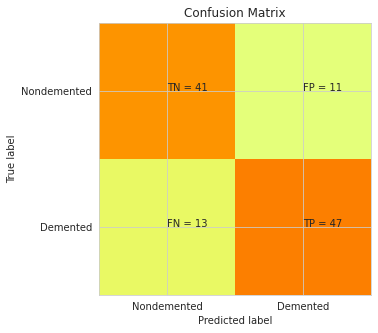

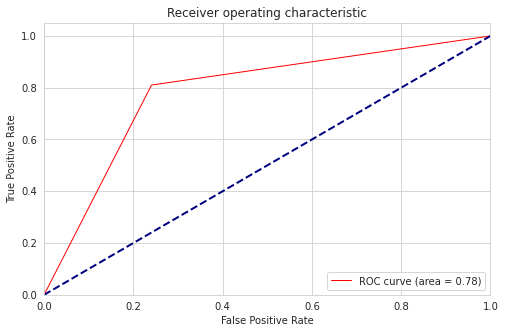


Acuuracy Of the Model:  0.7857142857142857 




In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
  max_depth=1, random_state=0)
gbc.fit(X_train, y_train.ravel())
report_performance(gbc) 
roc_curves(gbc)
accuracy(gbc)
#importances = clf.feature_importances_

#feat_importances = pd.Series(gbc.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **16. Histogram-based Gradient Boosting Classifier (Ensemble Method)**



Confusion Matrix:
[[44  8]
 [15 45]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.85      0.79        52
           1       0.85      0.75      0.80        60

    accuracy                           0.79       112
   macro avg       0.80      0.80      0.79       112
weighted avg       0.80      0.79      0.79       112



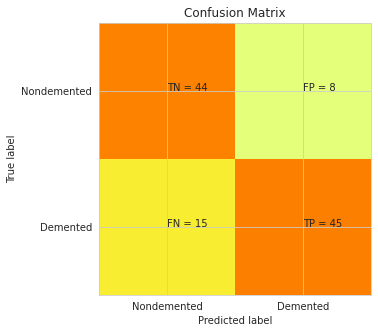

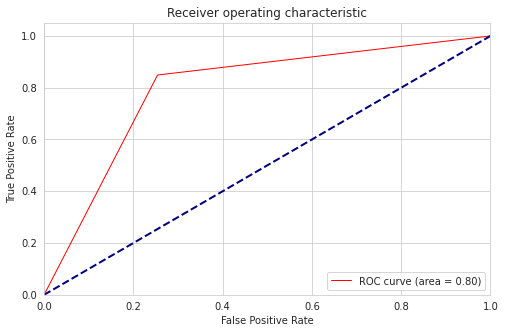


Acuuracy Of the Model:  0.7946428571428571 




In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier
lf = HistGradientBoostingClassifier(max_iter=100)

#gbr= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
lf.fit(X_train, y_train.ravel())
report_performance(lf) 
roc_curves(lf)
accuracy(lf)
#importances = clf.feature_importances_

#feat_importances = pd.Series(lf.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **17. KNeighborsClassifier**



Confusion Matrix:
[[39 13]
 [24 36]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.75      0.68        52
           1       0.73      0.60      0.66        60

    accuracy                           0.67       112
   macro avg       0.68      0.68      0.67       112
weighted avg       0.68      0.67      0.67       112



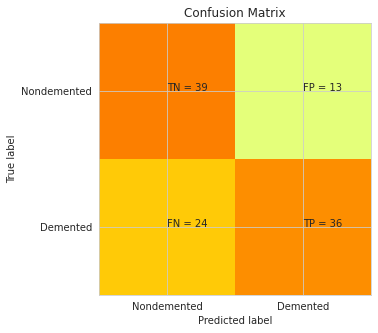

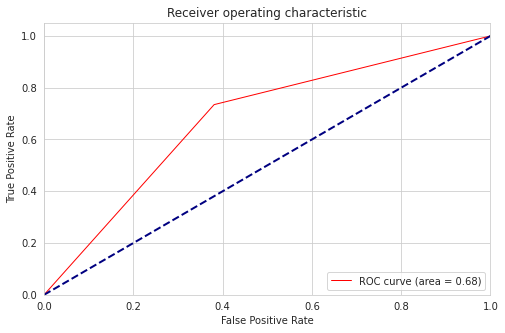


Acuuracy Of the Model:  0.6696428571428571 




In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train.ravel())
report_performance(neigh) 
roc_curves(neigh)
accuracy(neigh)
#importances = clf.feature_importances_

#feat_importances = pd.Series(neigh.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **18. SGDClassifier**



Confusion Matrix:
[[48  4]
 [35 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.92      0.71        52
           1       0.86      0.42      0.56        60

    accuracy                           0.65       112
   macro avg       0.72      0.67      0.64       112
weighted avg       0.73      0.65      0.63       112



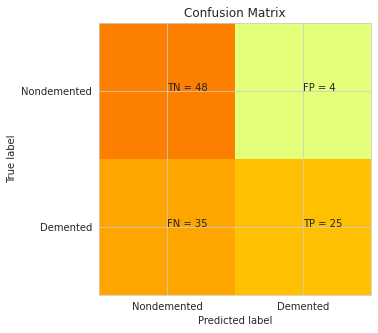

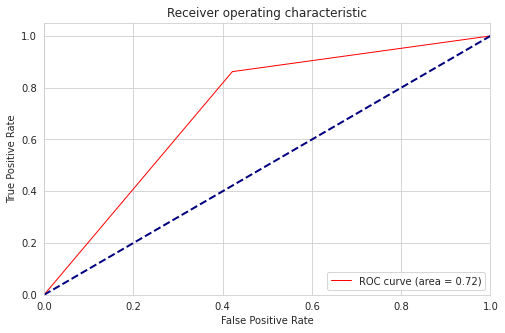


Acuuracy Of the Model:  0.6517857142857143 




In [44]:
from sklearn.linear_model import SGDClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
#X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
#Y = np.array([1, 1, 2, 2])
 # Always scale the input. The most convenient way is to use a pipeline.
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train.ravel())
report_performance(clf) 
roc_curves(clf)
accuracy(clf)
#importances = clf.feature_importances_

#feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **19.Quadratic Discriminant Analysis (LDA)**



Confusion Matrix:
[[47  5]
 [18 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        52
           1       0.89      0.70      0.79        60

    accuracy                           0.79       112
   macro avg       0.81      0.80      0.79       112
weighted avg       0.81      0.79      0.79       112



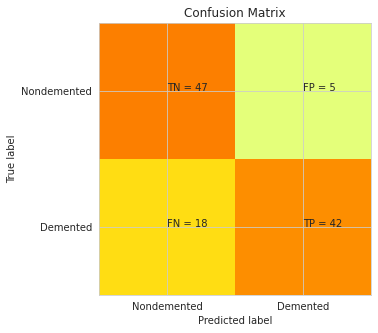

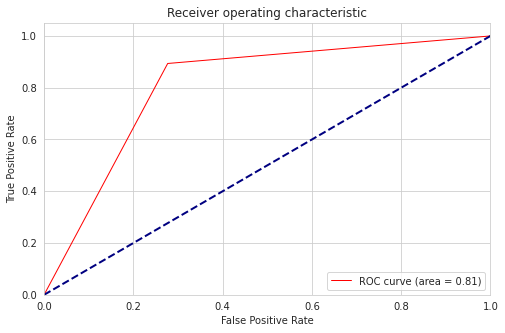


Acuuracy Of the Model:  0.7946428571428571 




In [45]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
#from sklearn.qda import QDA
clf = QDA()
clf.fit(X_train, y_train.ravel())
report_performance(clf) 
roc_curves(clf)
accuracy(clf)
#importances = clf.feature_importances_

#feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)
#feat_importances.nlargest(8).plot(kind='barh')
#plt.title("Feature Importance:")
#plt.show()

# **Model Comparison**

In [46]:
data = total_accuracy.values()
labels = total_accuracy.keys()

# **Comparison of different Model vs Accuracy**

Text(0, 0.5, 'Accuracy')

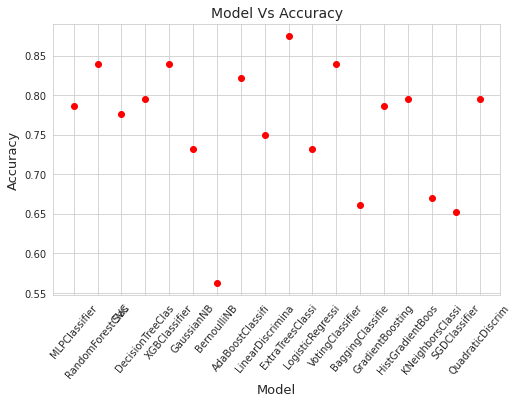

In [47]:
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Model',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)

# **ROC for Different Classifier**

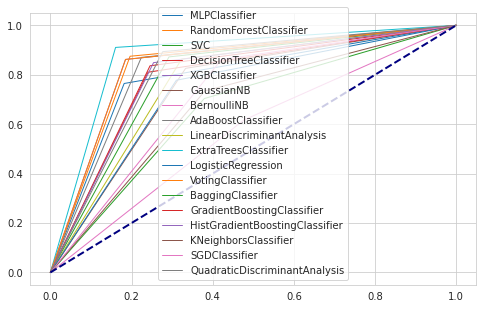

In [48]:
for i in total_fpr.keys():
    plt.plot(total_fpr[i],total_tpr[i],lw=1, label=i)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()